# Supervised Learning Capstone Project - Tree Methods Focus 

## GOAL: Create a model to predict whether or not a customer will Churn .

Data-source = https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [164]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Quick Data Check


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


# Exploratory Data Analysis

## General Feature Exploration

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

<Axes: xlabel='Churn', ylabel='count'>

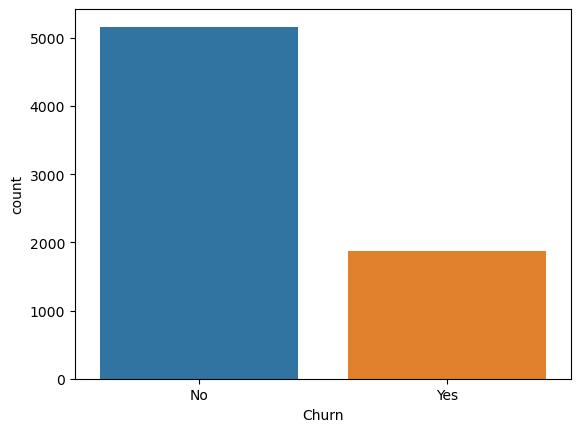

In [8]:
sns.countplot(df,x='Churn',hue='Churn')

In [9]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7027    1990.50
7028    7362.90
7029     346.45
7030     306.60
7031    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

<Axes: xlabel='Churn', ylabel='TotalCharges'>

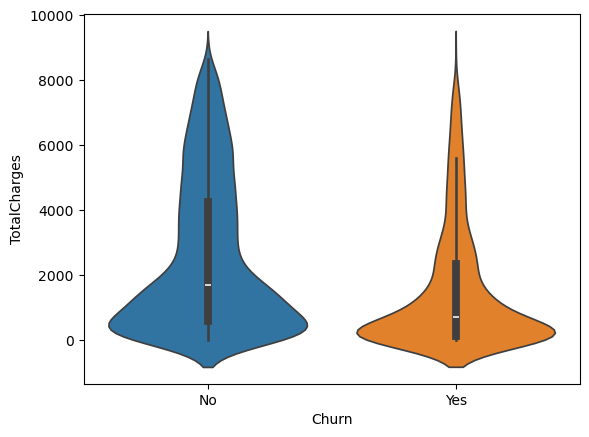

In [10]:
sns.violinplot(df,x='Churn',y='TotalCharges',hue='Churn')

In [11]:
df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

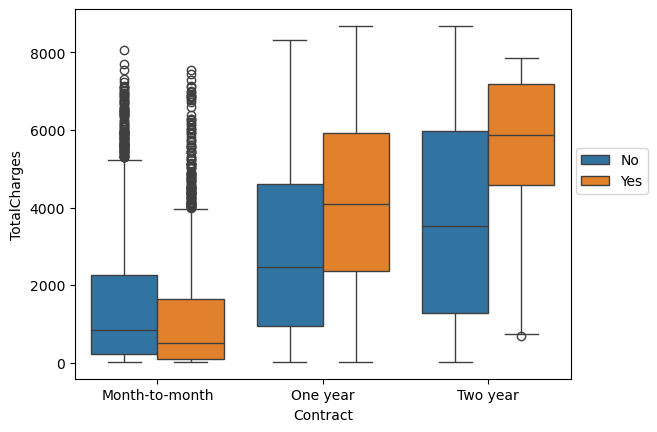

In [12]:
sns.boxplot(df,x='Contract',y='TotalCharges',hue='Churn')
plt.legend(loc=(1.01,.5))

In [13]:
int_df = df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

In [14]:
obj_df = pd.get_dummies(df.drop('customerID',axis=1).select_dtypes(include=object),dtype=int)

In [15]:
int_final_df = pd.concat([int_df,obj_df],axis=1)

In [16]:
corr_Churn = int_final_df.drop('Churn_No',axis=1).corr()['Churn_Yes']

In [17]:
corr_Churn.sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
OnlineBackup_No internet service          -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
StreamingMovies_No internet service       -0.227578
DeviceProtection_No internet service      -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
TotalCharges                              -0.199484
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMetho

C:\Users\Muzamil's Asus\AppData\Local\Temp\ipykernel_11196\1774630893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(corr_Churn.drop('Churn_Yes').sort_values(),palette='Set1')


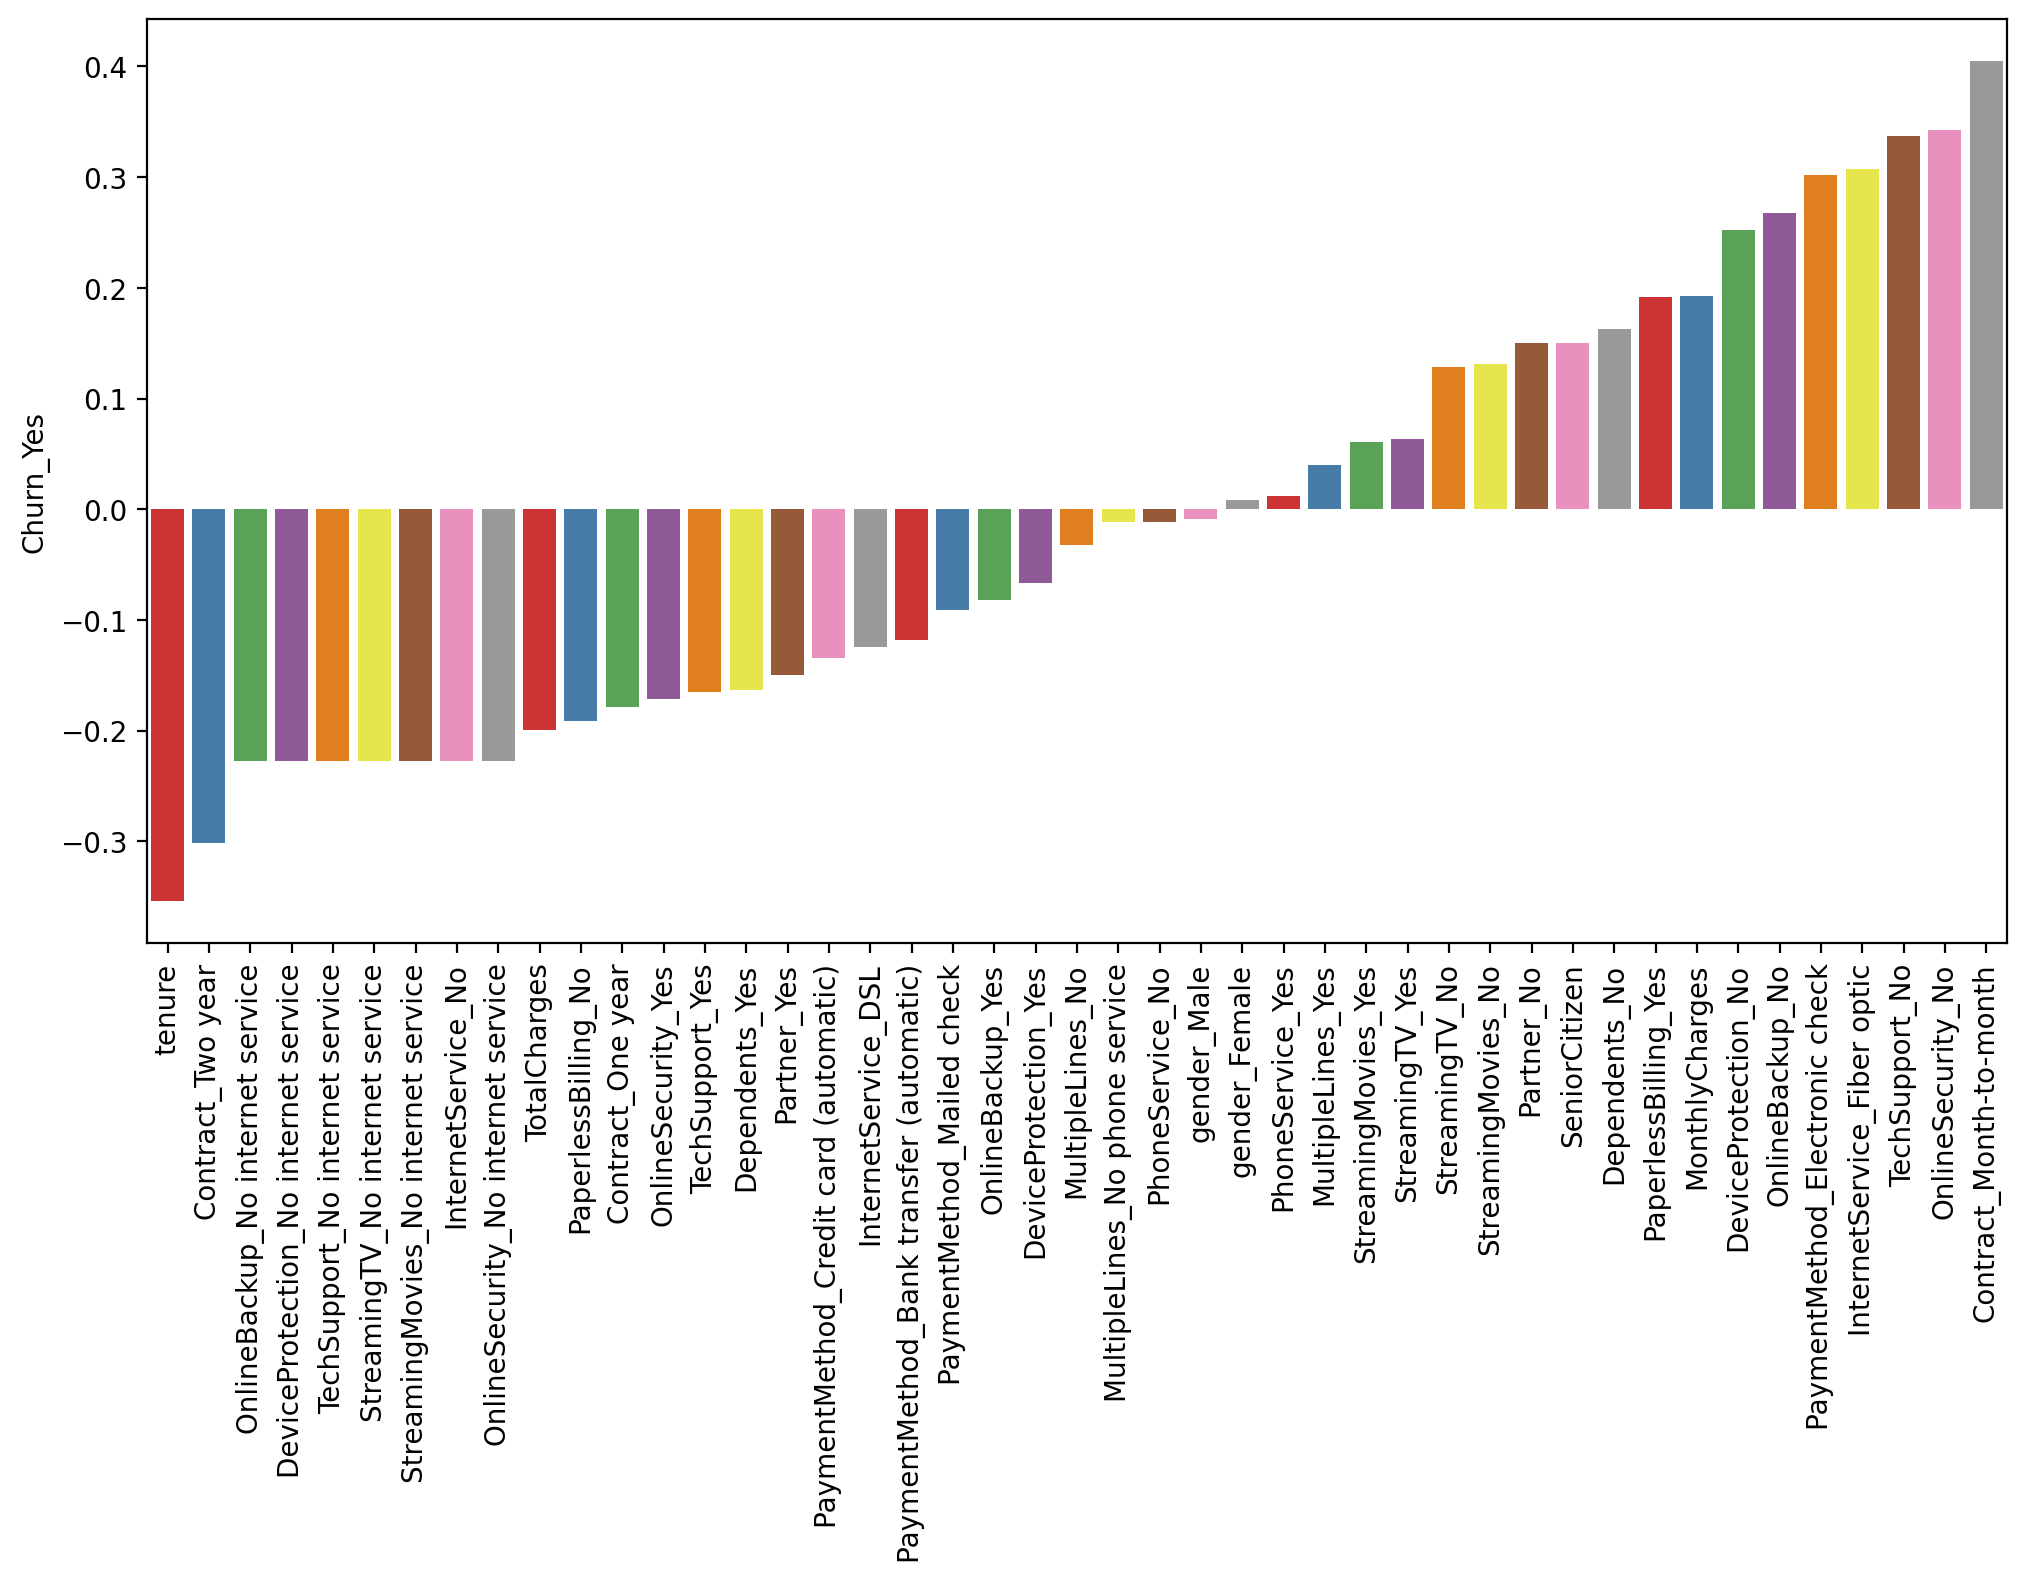

In [18]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(corr_Churn.drop('Churn_Yes').sort_values(),palette='Set1')
plt.xticks(rotation = 90);

---

# Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

In [19]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: ylabel='Count'>

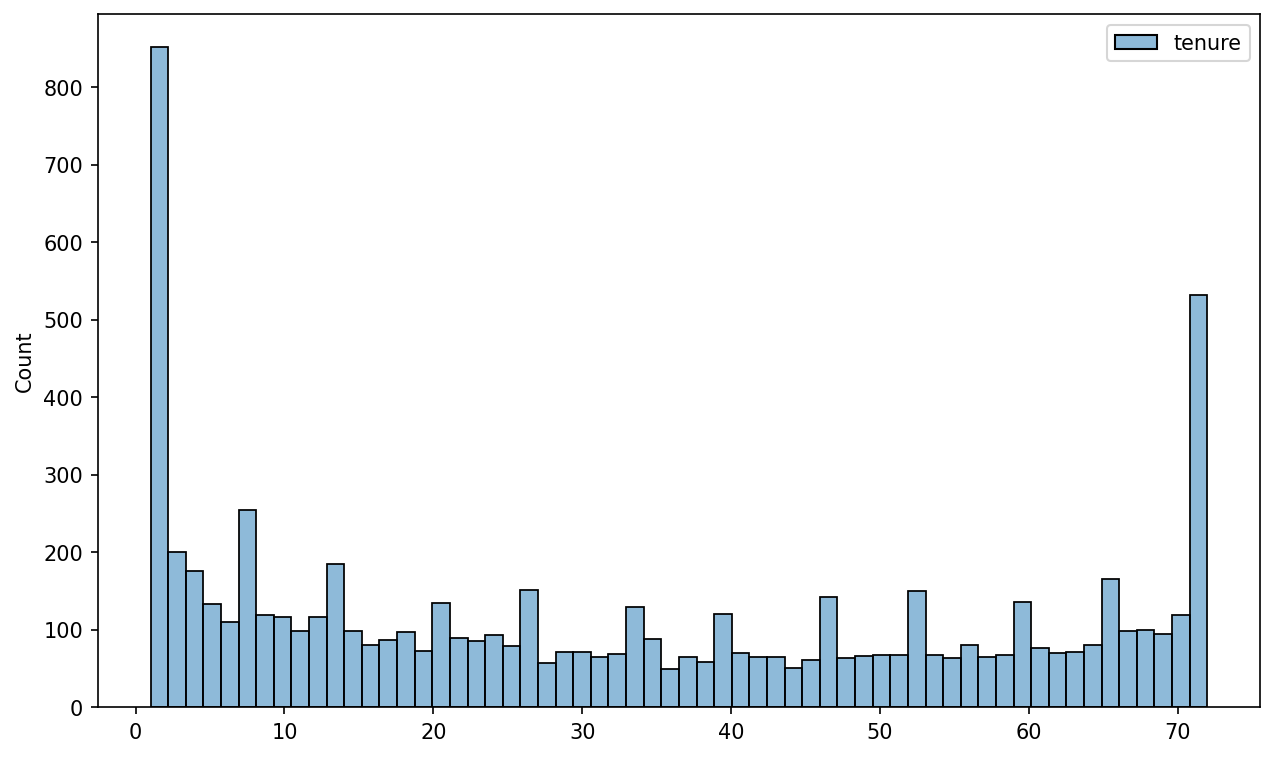

In [167]:
plt.figure(figsize=(10,6),dpi=150)
sns.histplot(df[['tenure','Contract']],bins=60)

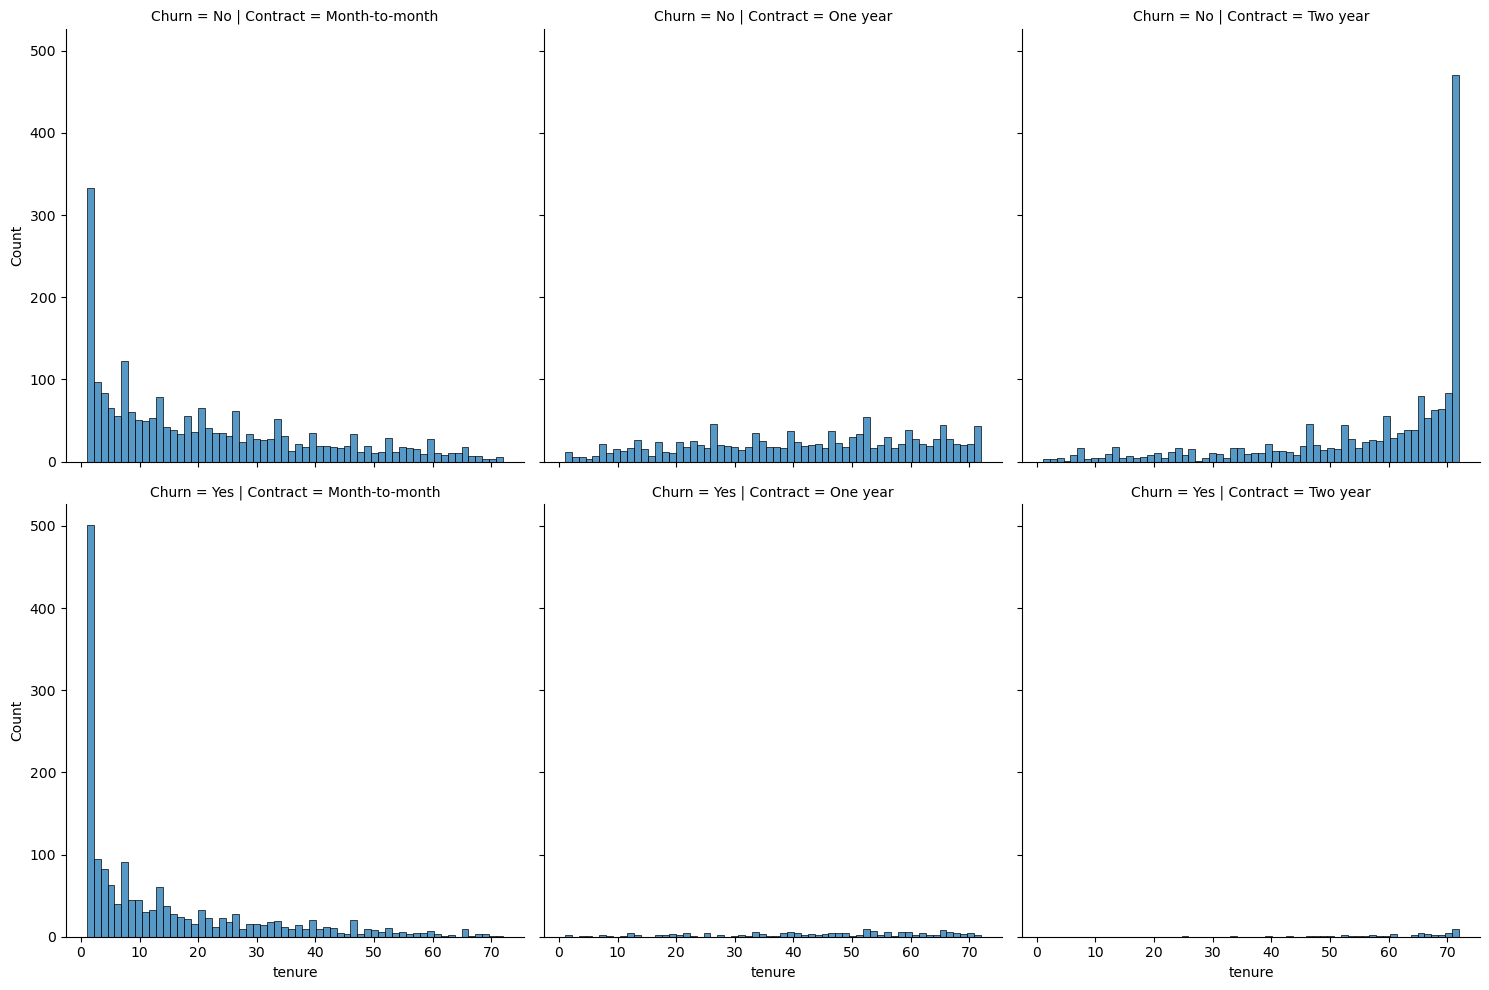

In [21]:
sns.displot(data=df,x='tenure',bins=60,col='Contract',row='Churn')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

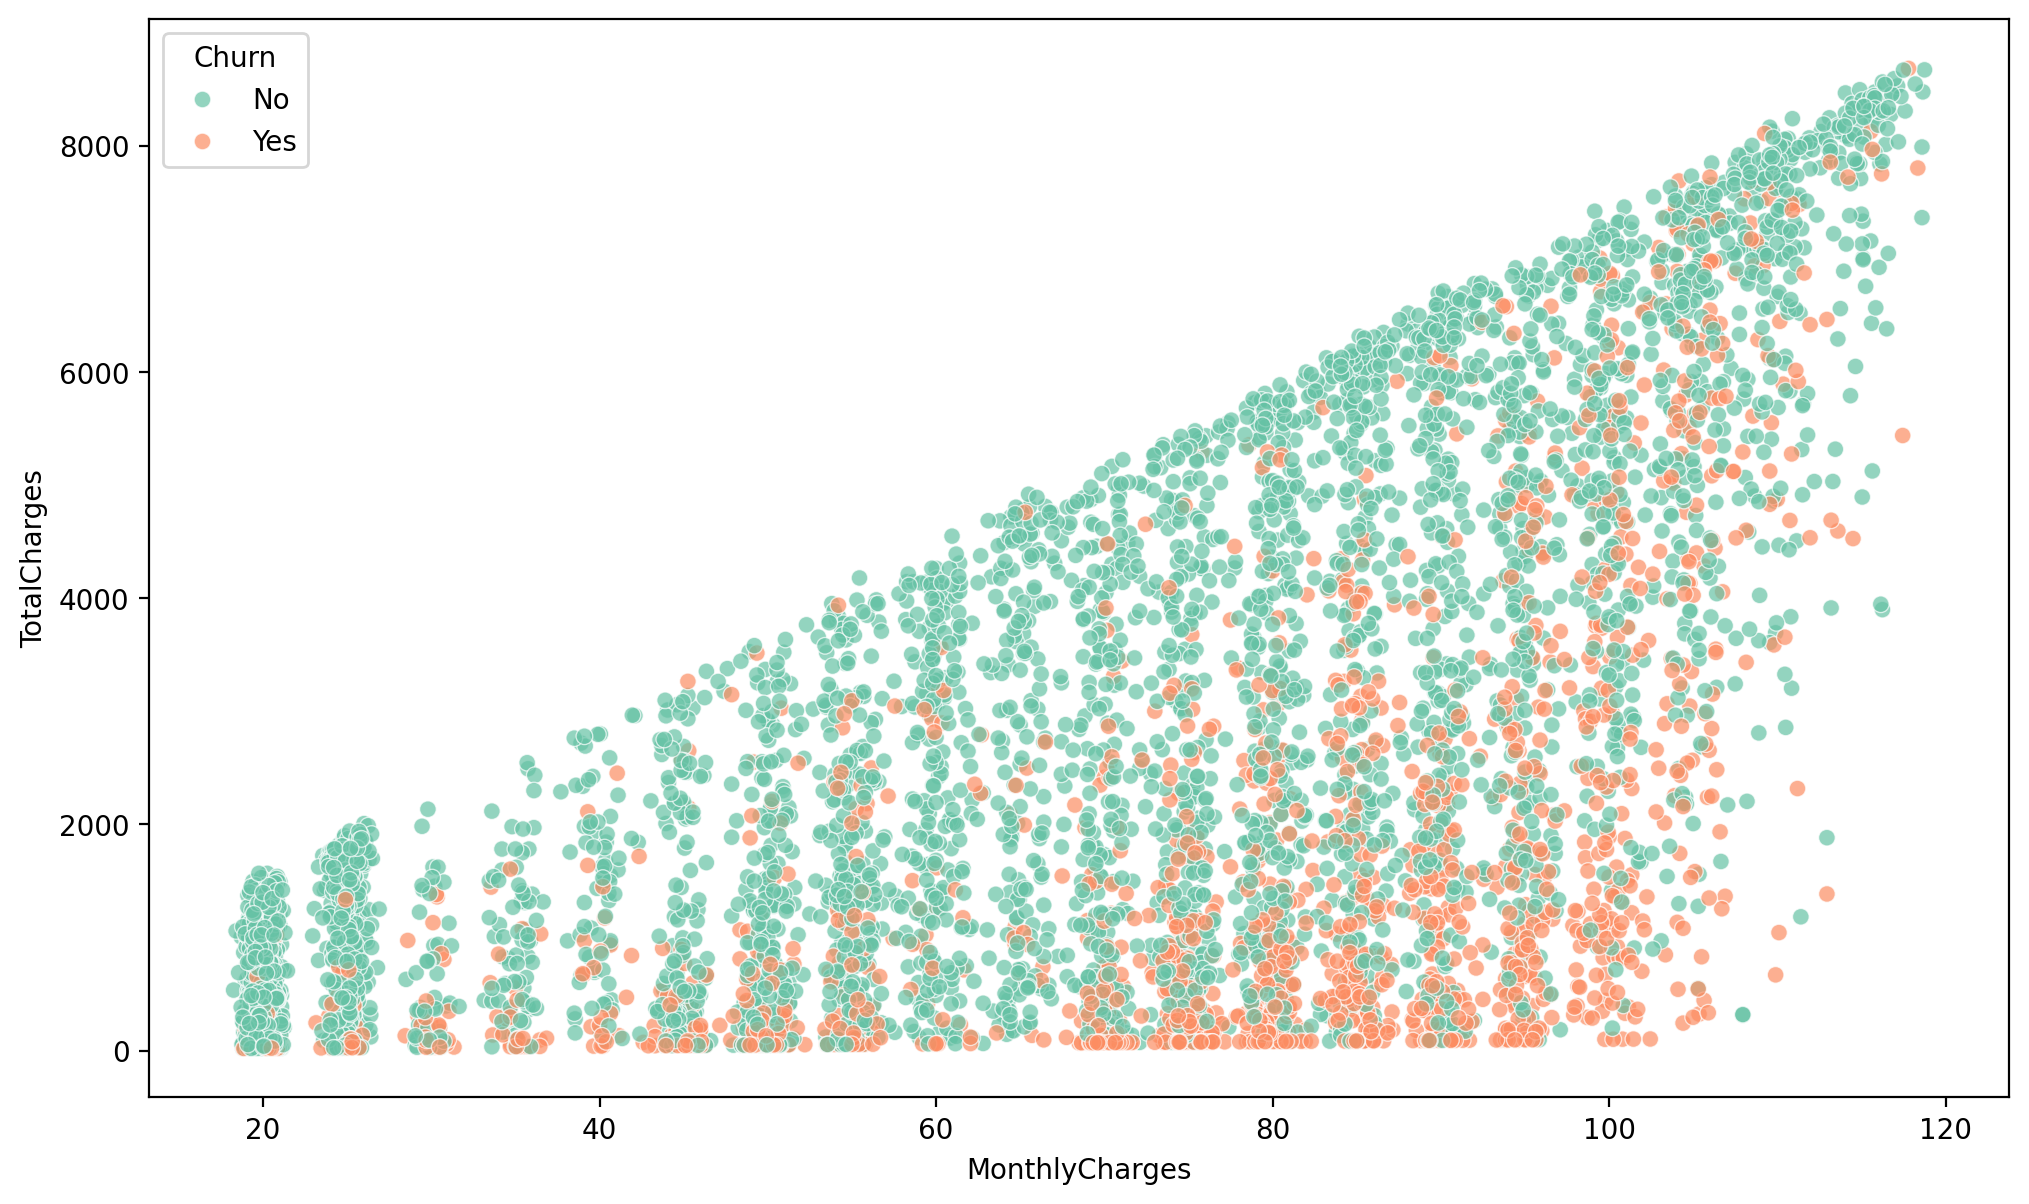

In [22]:
plt.figure(figsize=(12,7),dpi=200)
sns.scatterplot(df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.7,palette='Set2')

In [23]:
churn_no = df.groupby(['Churn','tenure']).count().transpose()['No']
churn_yes = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [24]:
churn_rate = 100 * churn_yes/(churn_yes+churn_no)

In [25]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

Text(0.5, 1.0, 'Churn Rate Per Customer')

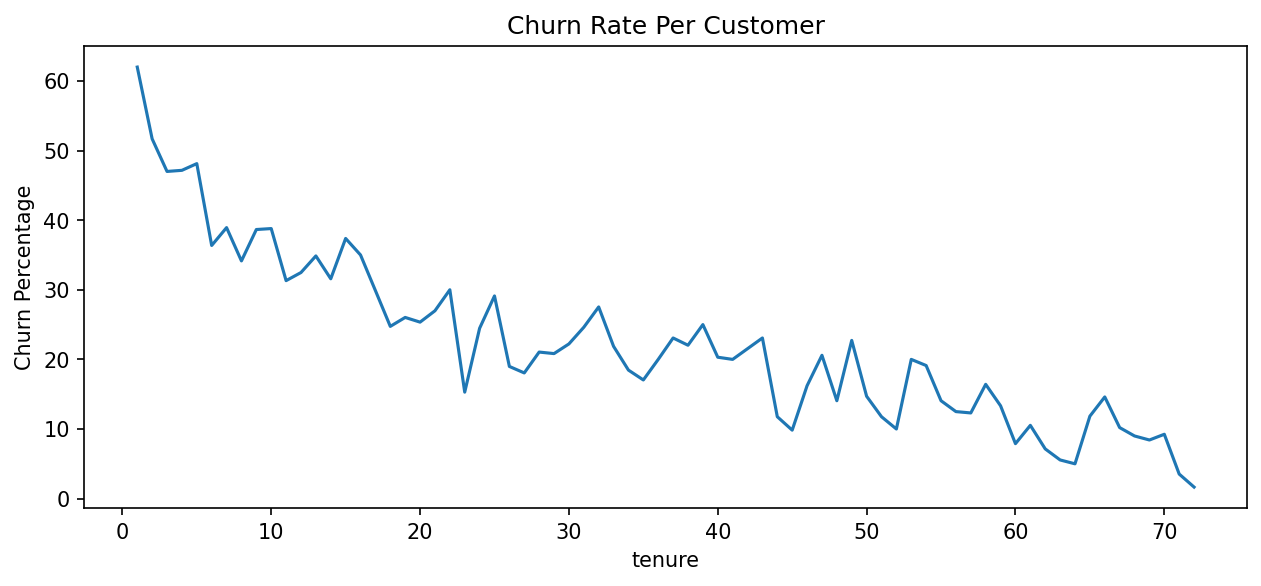

In [26]:
plt.figure(figsize=(10,4),dpi=150)
churn_rate.iloc[0].plot(kind='line')
plt.ylabel('Churn Percentage')
plt.title('Churn Rate Per Customer')

### Broader Cohort Groups
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [27]:
def churn(tenure):
    if tenure <= 12:
        return '0-12 Months'
    elif tenure <= 24:
        return '12-24 Months'
    elif tenure <= 48:
        return '24-48 Months'
    else:
        return 'over 48 Months'

In [28]:
df['Cohort'] = df['tenure'].apply(churn)

In [29]:
df[['tenure','Cohort']]

,tenure,Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


In [30]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Cohort'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

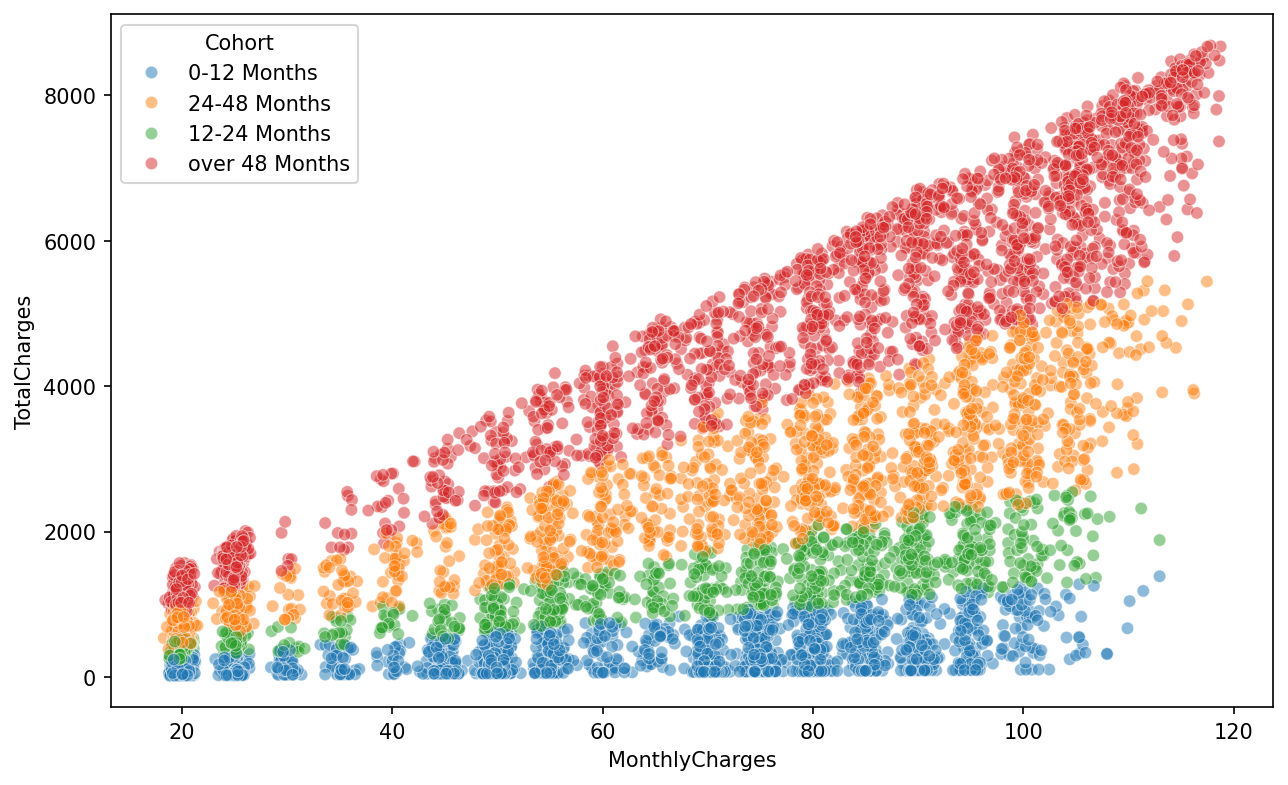

In [31]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Cohort',alpha=0.5)

<Axes: xlabel='Cohort', ylabel='count'>

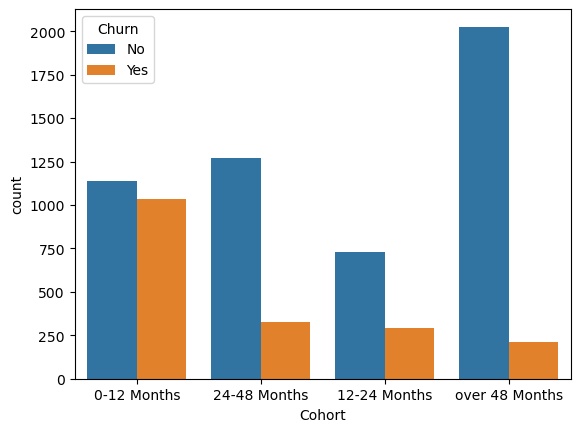

In [32]:
sns.countplot(data=df,x='Cohort',hue='Churn')

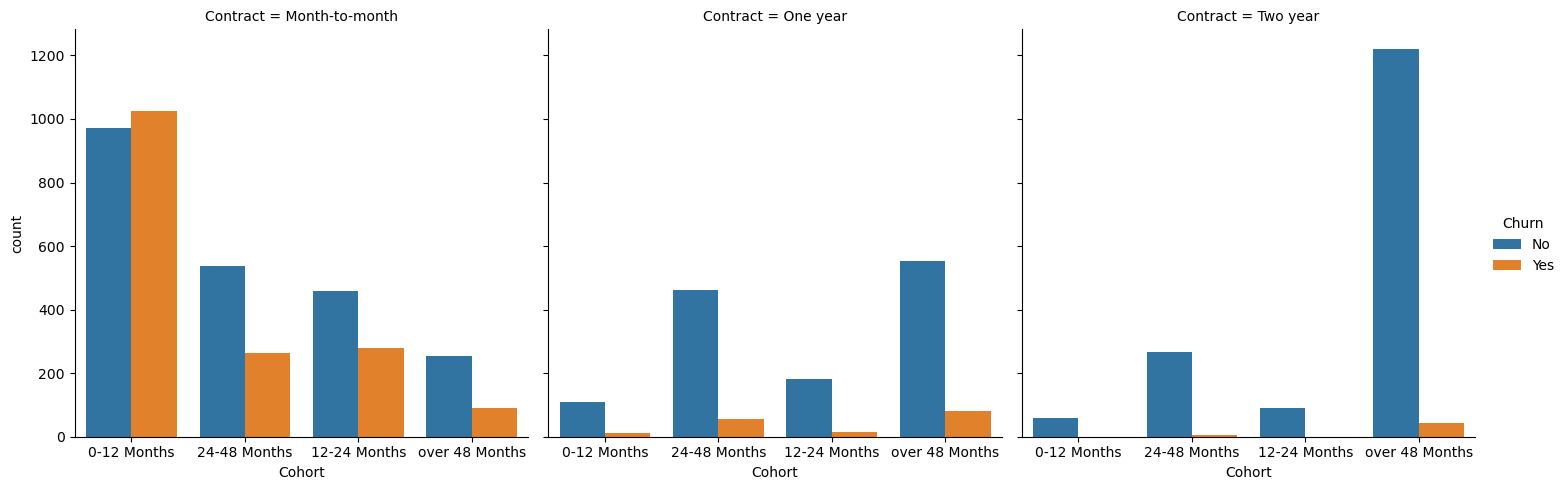

In [33]:
sns.catplot(data=df,x='Cohort',hue='Churn',col='Contract',kind='count')

## Tree Based Methods

In [34]:
pd.get_dummies(df.drop('customerID',axis=1),drop_first=True,dtype=int)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Cohort_12-24 Months,Cohort_24-48 Months,Cohort_over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,0,0,0,0,1
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,1,0,0,1,1,0,0,0


In [35]:
X = df.drop(['customerID','Churn'],axis=1)

In [36]:
X = pd.get_dummies(X,drop_first=True,dtype=int)

In [37]:
y = df['Churn']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [40]:
X_validiation, X_holdout, y_validiation, y_holdout = train_test_split(X_test, y_test, test_size=0.50, random_state=101)

## Decision Tree Perfomance.

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt = DecisionTreeClassifier(max_depth=6)

In [87]:
# from sklearn.model_selection import GridSearchCV

In [88]:
# param_grid = {
#     'criterion': ["gini", "entropy"],
#     'splitter': ['best','random'],
#     'max_depth': [None, 6, 8, 9, 10],
#     'min_samples_split': [10, 20, ],
#     'max_features': [None, 'sqrt', 'log2'],
#     'class_weight': [None, 'balanced']
# }


In [89]:
# grid_model = GridSearchCV(estimator=dt,
#                          param_grid=param_grid,
#                           scoring='accuracy',
#                          cv=5,
#                          verbose=1)

In [90]:
# grid_model.fit(X_train,y_train)

In [91]:
# grid_model.best_params_

In [92]:
# grid_model.best_estimator_.get_params()

In [93]:
# y_pred_valid = grid_model.predict(X_validiation)

In [94]:
# from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [95]:
# confusion_matrix(y_validiation,y_pred_valid)

In [96]:
# accuracy_score(y_validiation,y_pred_valid)

In [97]:
# y_pred_holdout = grid_model.predict(X_holdout)

In [98]:
# confusion_matrix(y_holdout,y_pred_holdout)

In [99]:
# accuracy_score(y_holdout,y_pred_holdout)

In [100]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [102]:
y_pred = dt.predict(X_validiation)

In [103]:
confusion_matrix(y_validiation,y_pred)

array([[358,  47],
       [ 65,  57]], dtype=int64)

In [104]:
accuracy_score(y_validiation,y_pred)

0.7874762808349146

In [105]:
print(classification_report(y_validiation,y_pred))

              precision    recall  f1-score   support

          No       0.85      0.88      0.86       405
         Yes       0.55      0.47      0.50       122

    accuracy                           0.79       527
   macro avg       0.70      0.68      0.68       527
weighted avg       0.78      0.79      0.78       527



In [108]:
final_pred = dt.predict(X_holdout)

In [128]:
confusion_matrix(y_holdout,final_pred)

array([[360,  34],
       [ 63,  71]], dtype=int64)

<Axes: >

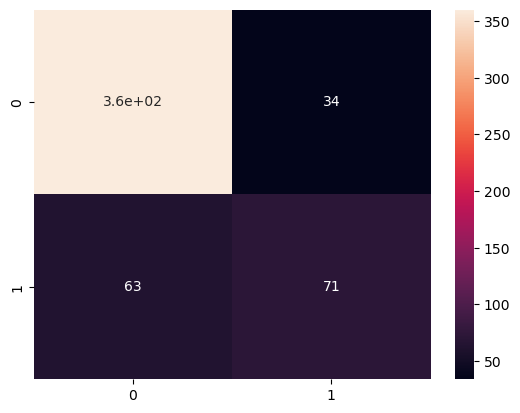

In [129]:
sns.heatmap(matrix,annot=True)

In [130]:
accuracy_score(y_holdout,final_pred)

0.8162878787878788

In [131]:
print(classification_report(y_holdout,final_pred))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88       394
         Yes       0.68      0.53      0.59       134

    accuracy                           0.82       528
   macro avg       0.76      0.72      0.74       528
weighted avg       0.81      0.82      0.81       528



In [112]:
from sklearn.tree import plot_tree

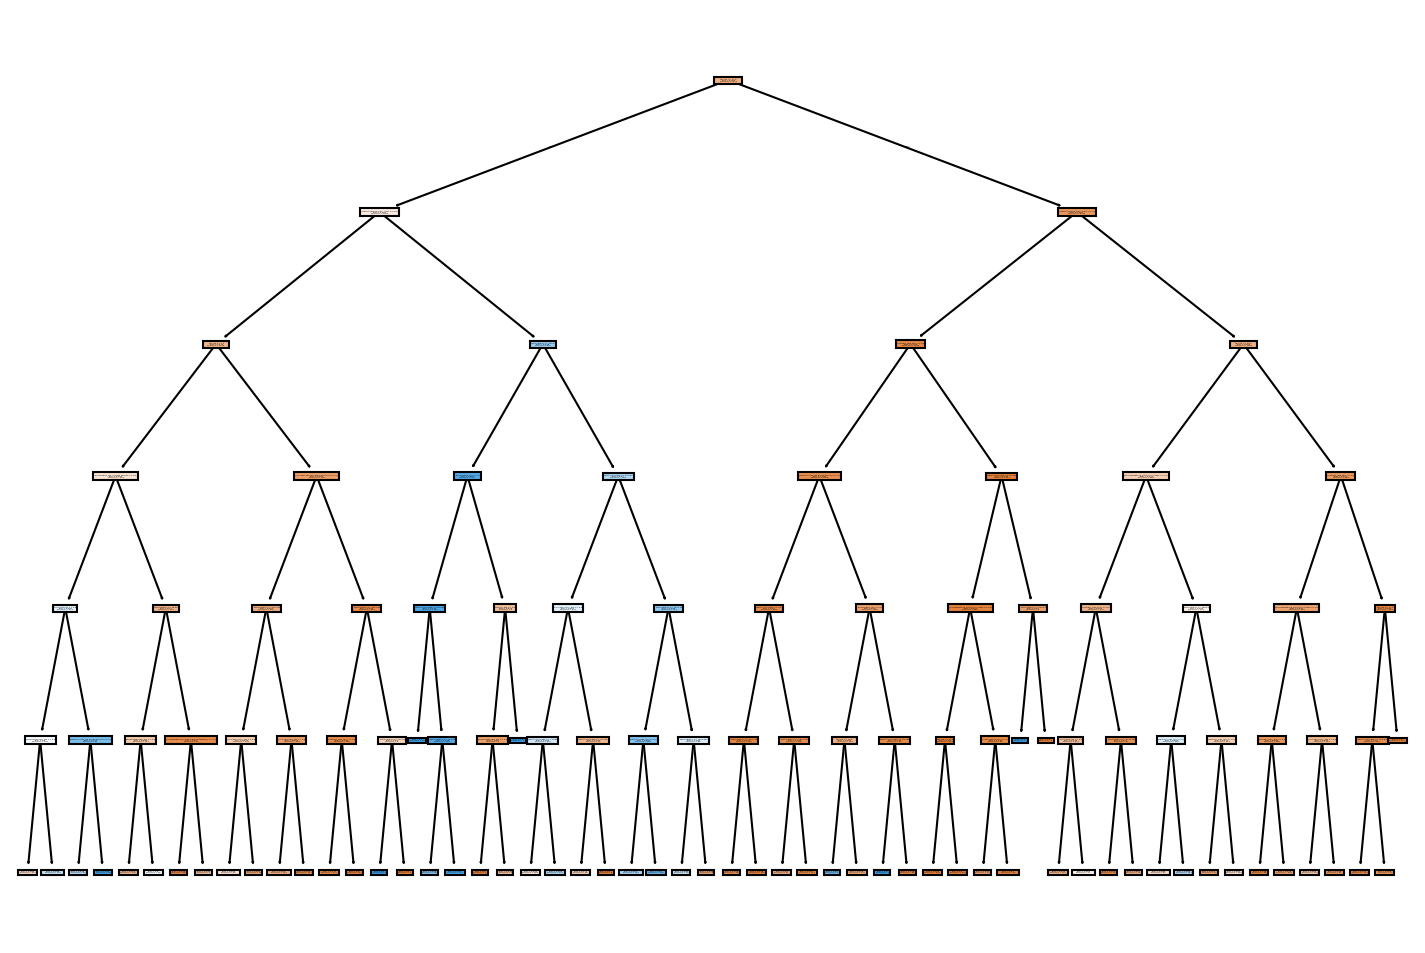

In [117]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns);

In [119]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

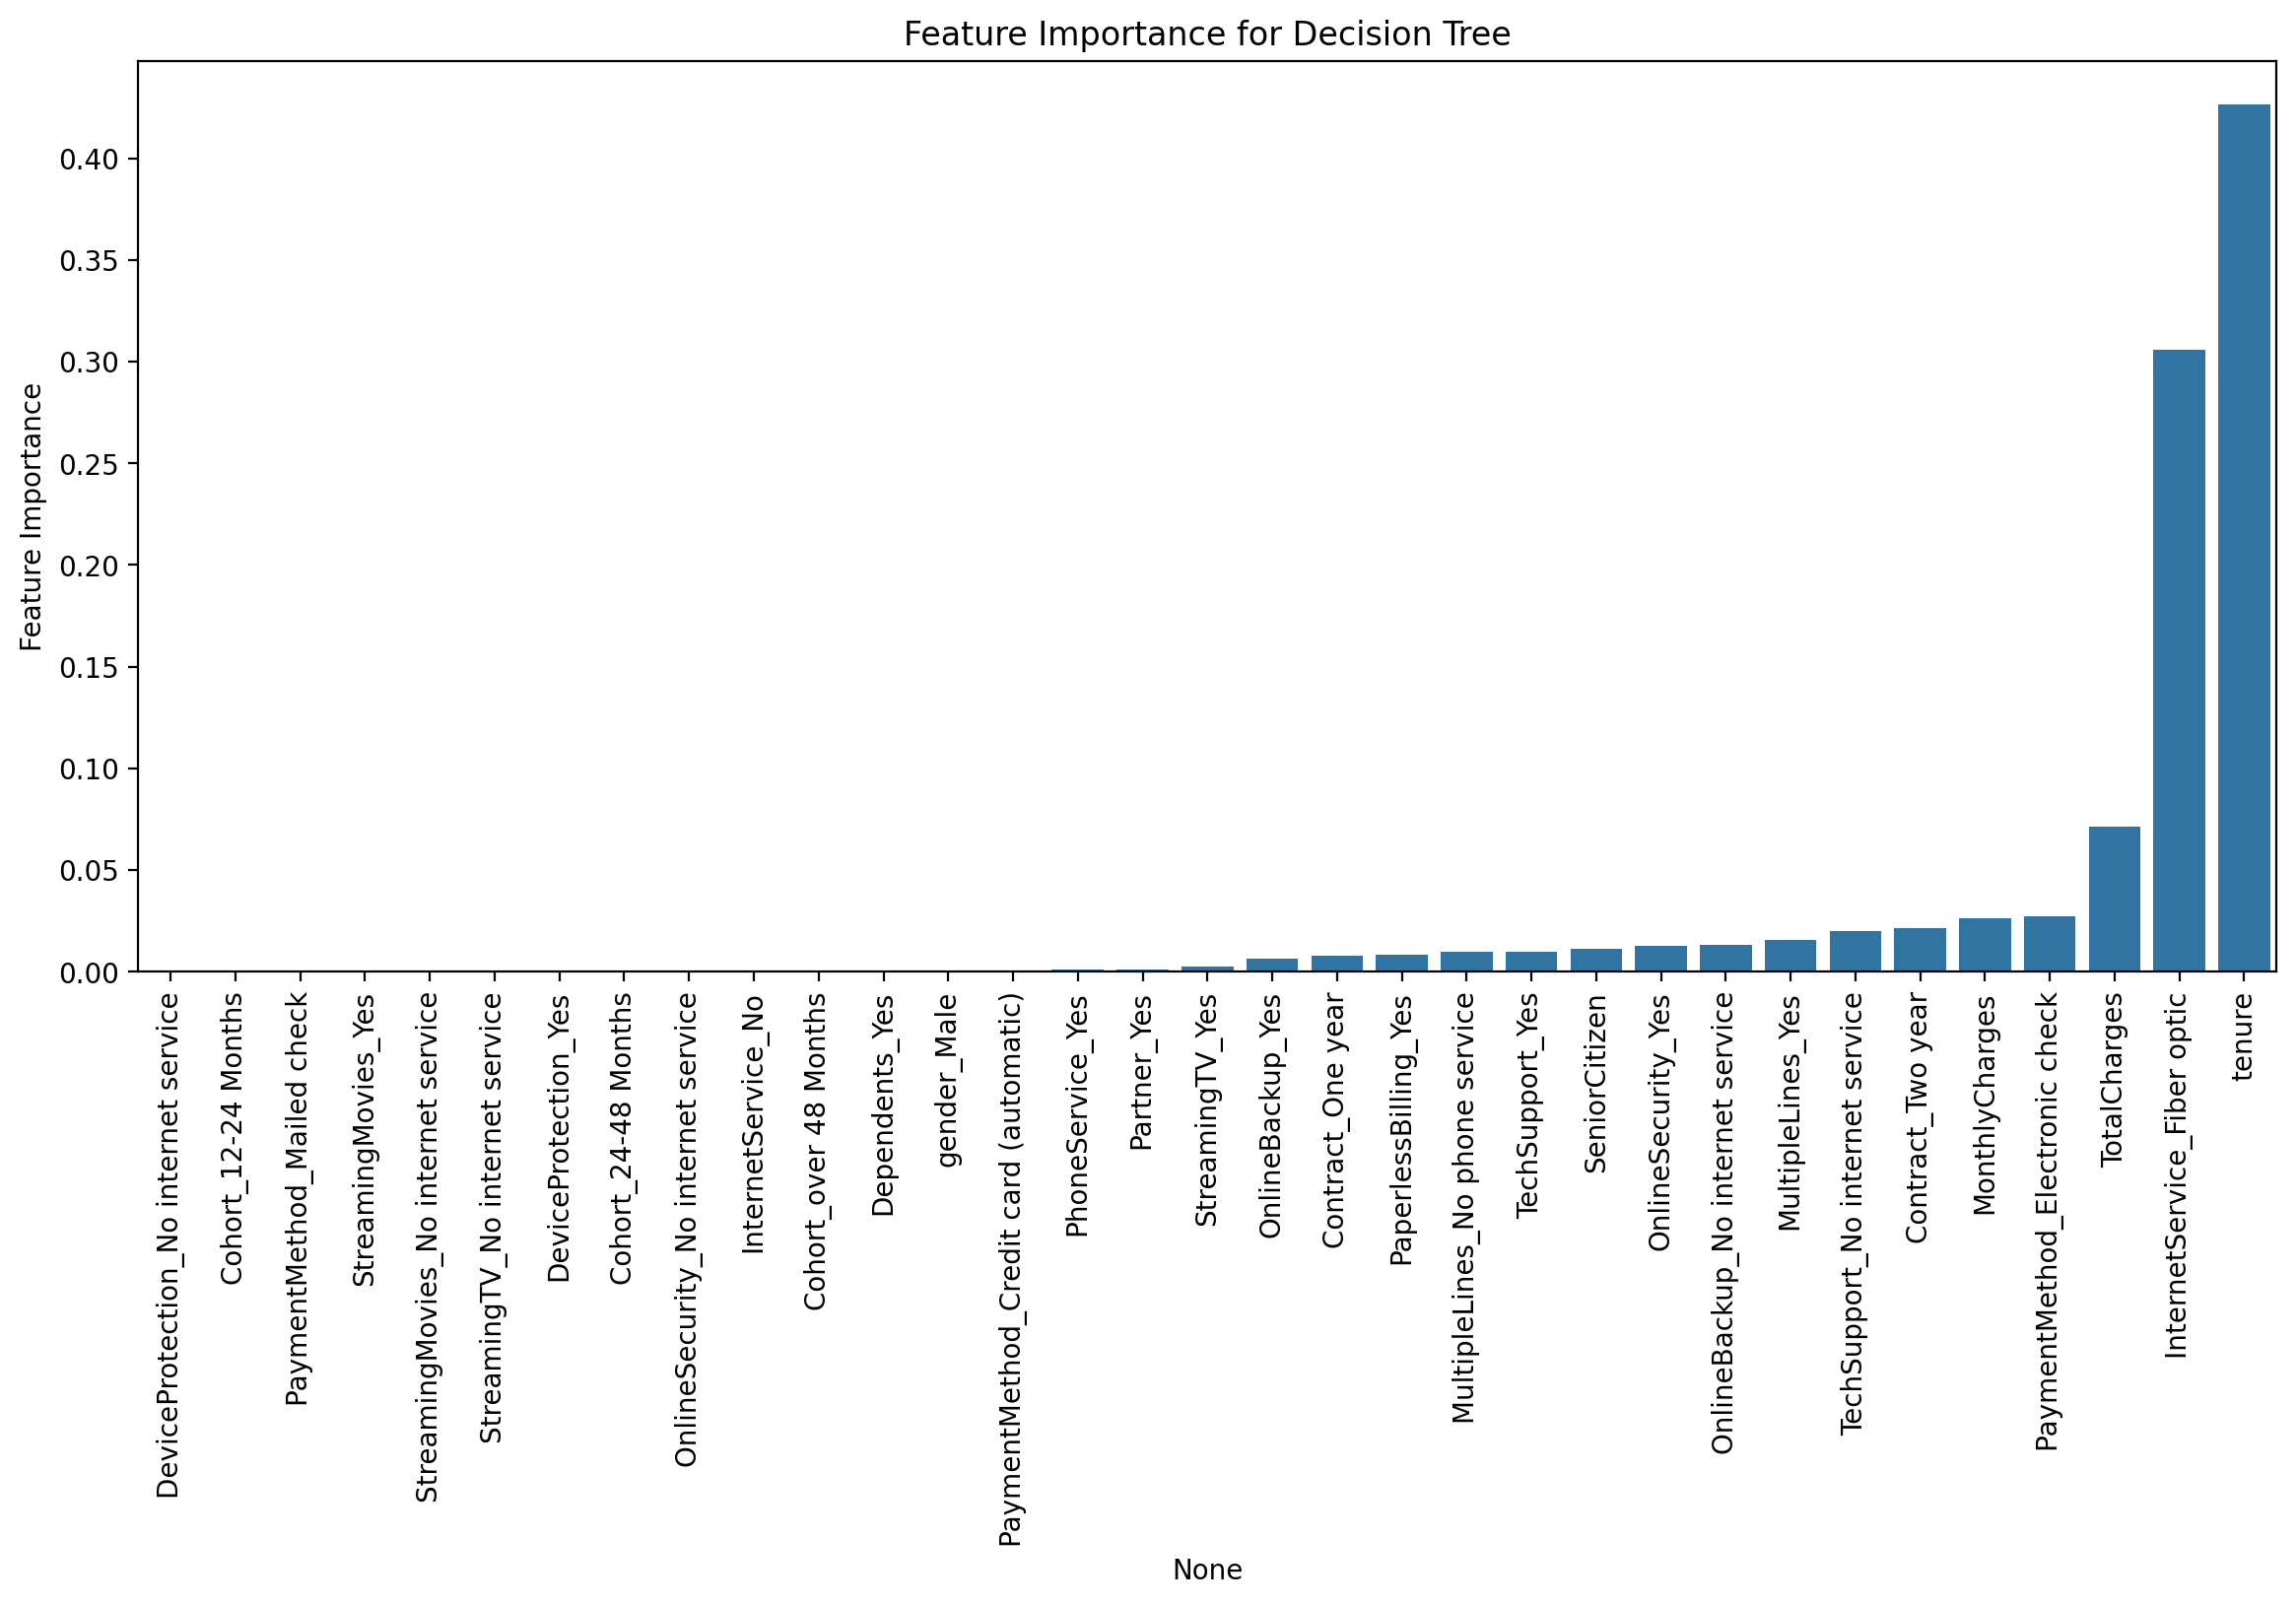

In [123]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

## Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf = RandomForestClassifier(n_estimators=100)

In [134]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [135]:
y_pred = rf.predict(X_validiation)

In [136]:
print(classification_report(y_validiation,y_pred))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86       405
         Yes       0.54      0.43      0.48       122

    accuracy                           0.78       527
   macro avg       0.69      0.66      0.67       527
weighted avg       0.77      0.78      0.77       527



In [137]:
confusion_matrix(y_validiation,y_pred)

array([[359,  46],
       [ 69,  53]], dtype=int64)

In [138]:
accuracy_score(y_validiation,y_pred)

0.7817836812144212

## Boosted Trees


In [139]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [147]:
ada_model = AdaBoostClassifier(n_estimators=100,algorithm='SAMME')

In [148]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

In [150]:
y_pred_ada = ada_model.predict(X_validiation)

In [151]:
print(classification_report(y_validiation,y_pred_ada))

              precision    recall  f1-score   support

          No       0.86      0.91      0.89       405
         Yes       0.65      0.52      0.58       122

    accuracy                           0.82       527
   macro avg       0.76      0.72      0.73       527
weighted avg       0.81      0.82      0.82       527



In [152]:
confusion_matrix(y_validiation,y_pred_ada)

array([[370,  35],
       [ 58,  64]], dtype=int64)

In [153]:
gb_model = GradientBoostingClassifier()

In [154]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [156]:
y_pred_gb = gb_model.predict(X_validiation)

In [157]:
print(classification_report(y_validiation,y_pred_gb))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88       405
         Yes       0.61      0.51      0.56       122

    accuracy                           0.81       527
   macro avg       0.74      0.71      0.72       527
weighted avg       0.80      0.81      0.81       527



In [158]:
final_pred_ada = ada_model.predict(X_holdout)

In [159]:
accuracy_score(y_holdout,final_pred_ada)

0.8314393939393939

In [160]:
print(classification_report(y_holdout,final_pred_ada))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89       394
         Yes       0.73      0.54      0.62       134

    accuracy                           0.83       528
   macro avg       0.79      0.73      0.75       528
weighted avg       0.82      0.83      0.82       528

